<a href="https://colab.research.google.com/github/cuongthuai/sd-cuongthuai-colab-config/blob/main/StableDiffusion_CUONGTHUAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

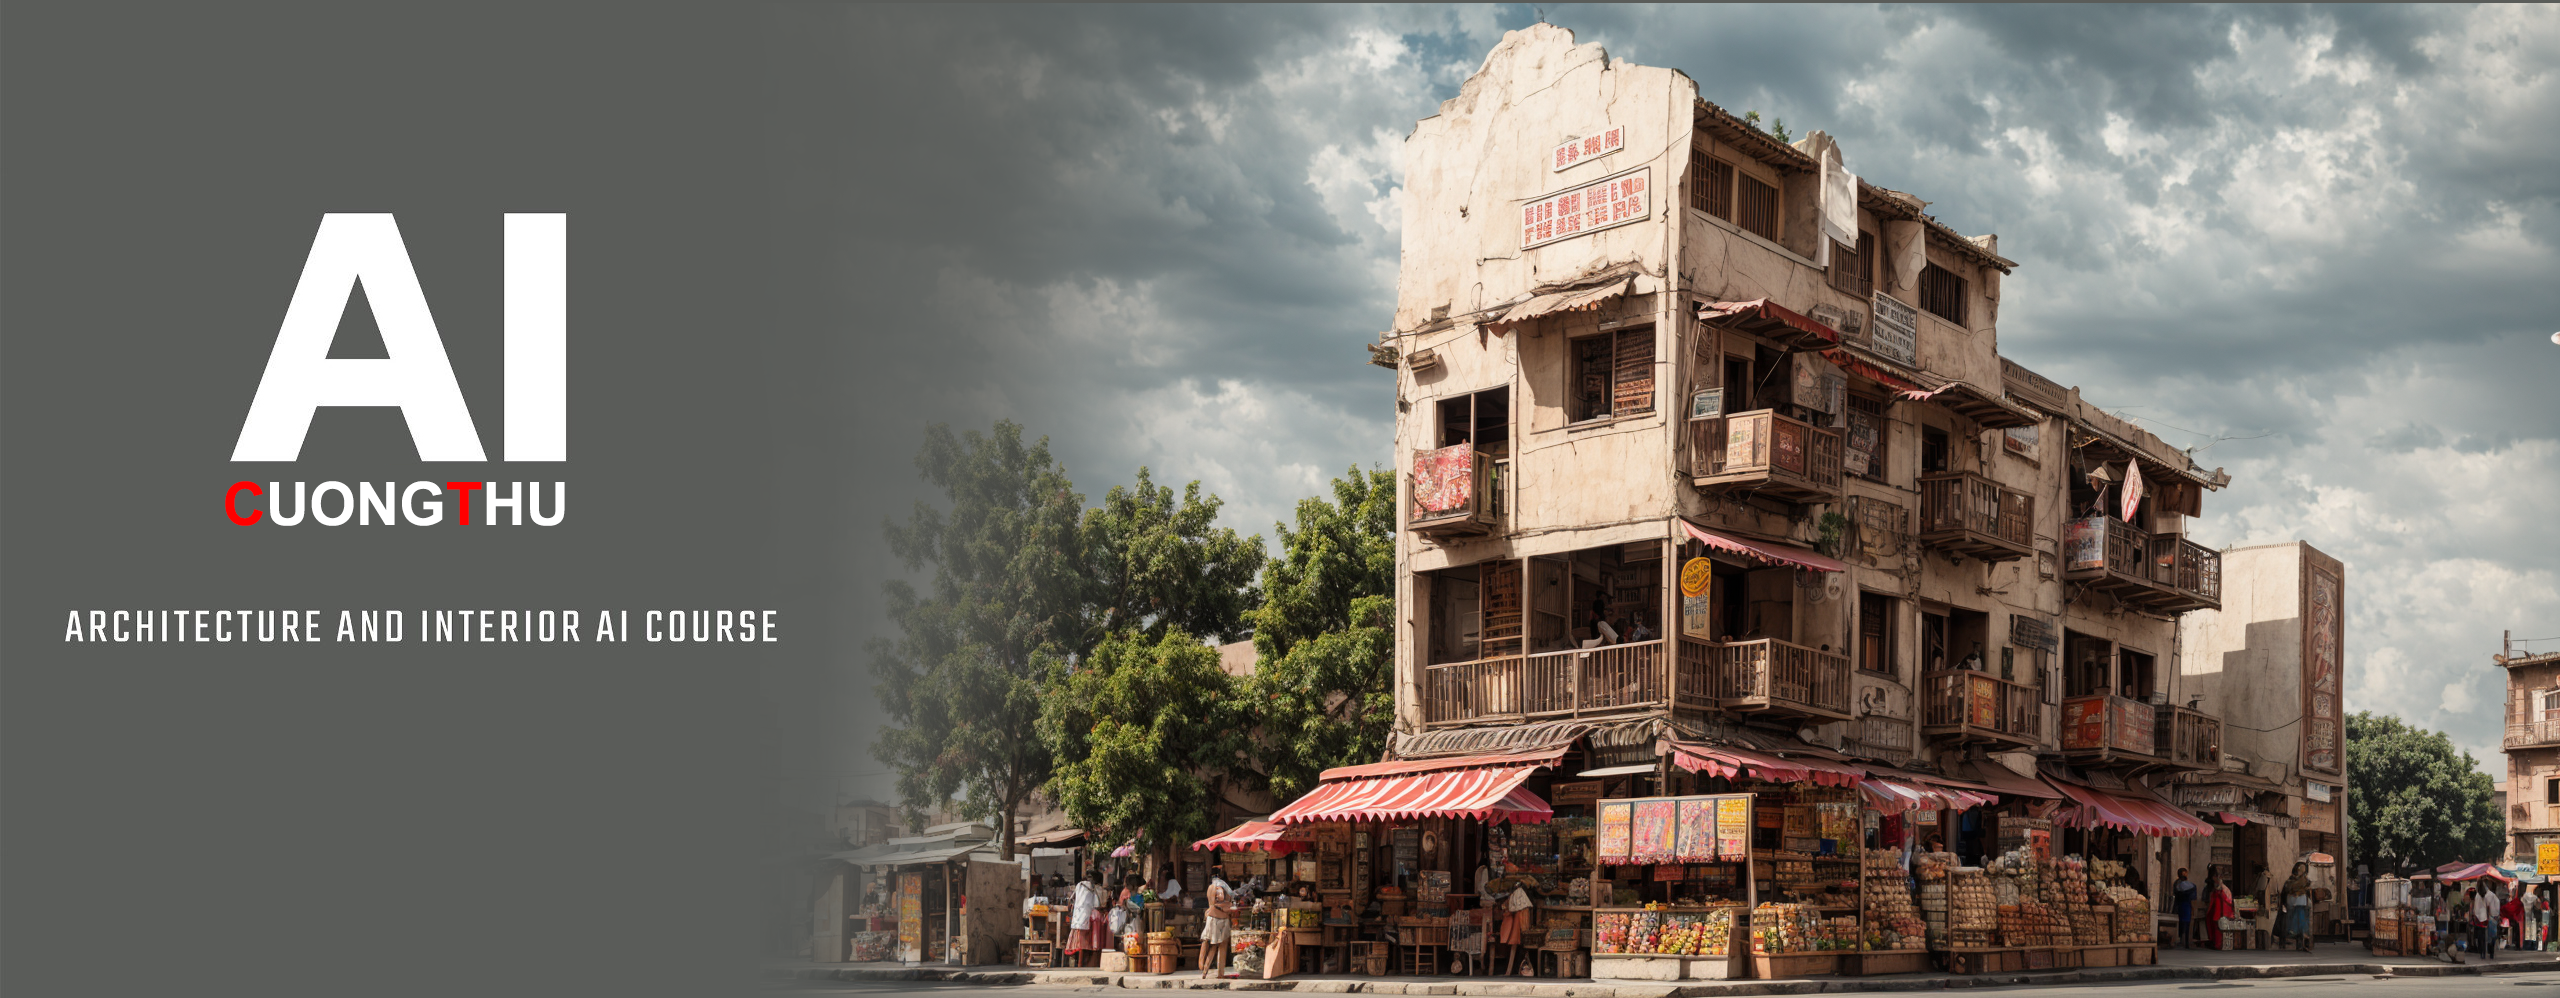

 ## **CUONGTHUAI-STABLE DIFFUSION PHIÊN BẢN GOOGLE COLAB**

[![](https://img.shields.io/badge/FACEBOOK-CUONGTHU.AI-blue
)](https://www.facebook.com/ktscuongnm) &nbsp; &nbsp; [![](https://img.shields.io/badge/HỌC%20STABLE%20DIFFUSION-YOUTUBE-E62117)](https://www.youtube.com/channel/UCieR8Ve85WzOPsAyAoEa1ZQ)





In [ ]:
#@title # 🤖 1. LỰA CHỌN MODEL
import os
from google.colab import drive
drive.mount('/content/drive')
%cd /content

# Cai dat tcmalloc
!apt -y update -qq
!apt-get install libgoogle-perftools4 libtcmalloc-minimal4 -y
!apt -y install -qq aria2
%env LD_PRELOAD=libtcmalloc_minimal.so.4.5.9

# Giao diện

mode = 'dark'
!aria2c --continue --console-log-level=error -c -x 16 -s 16 -k 1M https://raw.githubusercontent.com/minhnhatdo0709/sd-aiai-colab-config/main/repositories_link.txt -d /content -o links.txt
with open("/content/links.txt") as file:
  links = file.readlines()

url = links[0]
repo_name_start_index = url.rfind("/") + 1
repo_name = url[repo_name_start_index:].strip()

gitUrl = url
gitFolder = repo_name

!git clone $gitUrl
#Extension
%cd $gitFolder/extensions
for link in links:
  !git clone $link

control_net_folder_name = links[1][(links[1].rfind("/") + 1):].strip()
print(control_net_folder_name)

%cd ..

#Controlnet install Preprocessor

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/150_16_swin_l_oneformer_coco_100ep.pth -d /content/$gitFolder/models/oneformer -o 150_16_swin_l_oneformer_coco_100ep.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/250_16_swin_l_oneformer_ade20k_160k.pth -d /content/$gitFolder/models/oneformer -o 250_16_swin_l_oneformer_ade20k_160k.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/ZoeD_M12_N.pt -d /content/$gitFolder/models/zoedepth -o ZoeD_M12_N.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_beit_large_512.pt -d /content/$gitFolder/models/midas -o dpt_beit_large_512.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_hybrid-midas-501f0c75.pt -d /content/$gitFolder/models/midas -o dpt_hybrid-midas-501f0c75.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_large-midas-2f21e586.pt -d /content/$gitFolder/models/midas -o dpt_large-midas-2f21e586.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/facenet.pth -d /content/$gitFolder/models/openpose -o facenet.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/hand_pose_model.pth -d /content/$gitFolder/models/openpose -o hand_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/body_pose_model.pth -d /content/$gitFolder/models/openpose -o body_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth -d /content/$gitFolder/models/keypose -o faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth -d /content/$gitFolder/models/keypose -o hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/latest_net_G.pth -d /content/$gitFolder/models/leres -o latest_net_G.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/res101.pth -d /content/$gitFolder/models/leres -o res101.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/mlsd_large_512_fp32.pth -d /content/$gitFolder/models/mlsd -o mlsd_large_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/netG.pth -d /content/$gitFolder/models/lineart_anime -o netG.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/network-bsds500.pth -d /content/$gitFolder/models/hed -o network-bsds500.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/scannet.pt -d /content/$gitFolder/models/normal_bae -o scannet.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/sk_model.pth -d /content/$gitFolder/models/lineart -o sk_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/sk_model2.pth -d /content/$gitFolder/models/lineart -o sk_model2.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/table5_pidinet.pth -d /content/$gitFolder/models/pidinet -o table5_pidinet.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/upernet_global_small.pth -d /content/$gitFolder/models/uniformer -o upernet_global_small.pth

#ControlNet Model

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_canny.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_depth_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11f1p_sd15_depth.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_lineart.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_mlsd.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_openpose.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_scribble.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_seg_fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15s2_lineart_anime.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11u_sd15_tile_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11u_sd15_tile.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_inpaint_fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/44873 -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_ip2p_fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/44873?type=Config -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_ip2p_fp16.yaml

# VAE FILE

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.ckpt -d /content/$gitFolder/models/Stable-diffusion -o VAE84.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-ema-original/resolve/main/vae-ft-ema-560000-ema-pruned.safetensors -d /content/$gitFolder/models/Stable-diffusion -o VAE56.vae.pt

# Upscaler
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/125843 -d /content/$gitFolder/models/ESRGAN -o 4x-UltraSharp.pth


#Custom

!mkdir /content/drive/MyDrive/Sd-webui
!mkdir /content/drive/MyDrive/Sd-webui/Model
!mkdir /content/drive/MyDrive/Sd-webui/Setting
!mkdir /content/drive/MyDrive/Sd-webui/Lora
!mkdir /content/drive/MyDrive/Sd-webui/EliAILora
!mkdir /content/drive/MyDrive/Sd-webui/Embeddings
!mkdir /content/drive/MyDrive/Sd-webui/wildcards
!mkdir /content/drive/MyDrive/Sd-webui/Hypernetworks
!mkdir /content/drive/MyDrive/Sd-webui/Outputs
!mkdir /content/$gitFolder/outputs

!ln -s /content/drive/MyDrive/Sd-webui/wildcards /content/$gitFolder/extensions/sd-dynamic-prompts/

!aria2c --auto-file-renaming=false -c -x 16 -s 16 -k 1M https://raw.githubusercontent.com/minhnhatdo0709/sd-aiai-colab-config/main/config.json -d /content/drive/MyDrive/Sd-webui/Setting -o config.json

model_urls = [
    {
        "name": "Chilloutmix",
        "download_url": "https://civitai.com/api/download/models/11745"
    },
    {
        "name": "DreamShaper4",
        "download_url": "https://civitai.com/api/download/models/24365"
    },
    {
        "name": "RealisticVision_V30",
        "download_url": "https://civitai.com/api/download/models/105674"
    },
    {
        "name": "RealisticVision_V40",
        "download_url": "https://civitai.com/api/download/models/114367"
    },
    {
        "name": "Deliberate",
        "download_url": "https://civitai.com/api/download/models/15236"
    },
    {
        "name": "dvArch",
        "download_url": "https://civitai.com/api/download/models/10081"
    },
    {
        "name": "XSarchitectural",
        "download_url": "https://civitai.com/api/download/models/38193"
    },
    {
        "name": "ReV-Animated",
        "download_url": "https://civitai.com/api/download/models/46846"
    },
    {
        "name": "Sd-webui-v15",
        "download_url": "https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.safetensors"
    }
]
def find_model_by_name(model_list, name):
    for model in model_list:
        if model["name"] == name:
            return model
    return None
#@markdown #Chọn Model
Model = "RealisticVision_V30" #@param ["None Model", "Chilloutmix", "DreamShaper4", "RealisticVision_V30", "RealisticVision_V40", "dvArch", "XSarchitectural", "Deliberate", "ReV-Animated", "Sd-webui-v15"]
if Model != "None Model":
  model_url = find_model_by_name(model_urls, Model)["download_url"]
  ckpt = "/content/drive/MyDrive/Sd-webui/Model/{}.safetensors".format(Model)
  model_download_command = "aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {} -d /content/drive/MyDrive/Sd-webui/Model -o {}.safetensors".format(model_url, Model)
  !{model_download_command}
else:
  ckpt = "/content/drive/MyDrive/Sd-webui/Model/xyz.safetensors"




Mounted at /content/drive
/content
14 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgoogle-perftools4 is already the newest version (2.9.1-0ubuntu3).
libgoogle-perftools4 set to manually installed.
libtcmalloc-minimal4 is already the newest version (2.9.1-0ubuntu3).
libtcmalloc-minimal4 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubunt

In [ ]:
#@title # 🤖 2. CHẠY STABLE DIFFUSION
!python launch.py --api --share --listen --theme dark --opt-sdp-attention --enable-insecure-extension-access  --ui-config-file /content/drive/MyDrive/Sd-webui/Setting/ui-config.json --ui-settings-file /content/drive/MyDrive/Sd-webui/Setting/config.json --ckpt $ckpt --ckpt-dir /content/drive/MyDrive/Sd-webui/Model/ --lora-dir /content/drive/MyDrive/Sd-webui/Lora/ --embeddings-dir /content/drive/MyDrive/Sd-webui/Embeddings --styles-file /content/drive/MyDrive/Sd-webui/Setting/styles.csv --hypernetwork-dir /content/drive/MyDrive/Sd-webui/Hypernetworks

Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Version: v1.6.0-2-g4afaaf8a
Commit hash: 4afaaf8a020c1df457bcf7250cb1c7f609699fa7
Installing clip
Installing open_clip
Cloning Stable Diffusion into /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai...
Cloning into '/content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 580 (delta 248), reused 217 (delta 216), pack-reused 270
Receiving objects: 100% (580/580), 73.43 MiB | 46.25 MiB/s, done.
Resolving deltas: 100% (280/280), done.
Cloning Stable Diffusion XL into /content/stable-diffusion-webui/repositories/generative-models...
Cloning into '/content/stable-diffusion-webui/repositories/generative-models'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (393/393), done.
remote: Compressing objects: 100% (157/1